## Multilayer Perceptron (MLP)

MSE: 30.448


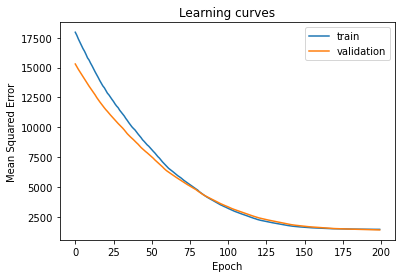

In [14]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv'
df = read_csv(path, header=None)
# Split data input and output columns
X, y = df.values[:,:-1], df.values[:,-1]
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
# determine the number of input features
n_feature = X.shape[1]

# define model (hidden layer)
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_feature,)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=0, validation_data=(X_test,y_test))

# predict test set
yhat = model.predict(X_test)
# evluate predictions
score = mean_absolute_error(y_test, yhat)
print('MSE: %.3f' % score)

# plot learning curve
pyplot.title('Learning curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

MSE: 30.472


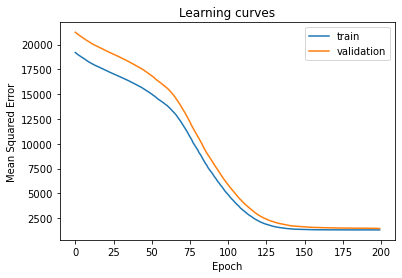

In [13]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv'
df = read_csv(path, header=None)
# Split data input and output columns
X, y = df.values[:,:-1], df.values[:,-1]
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
# determine the number of input features
n_feature = X.shape[1]

# define model (hidden layer)
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_feature,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=0, validation_data=(X_test,y_test))

# predict test set
yhat = model.predict(X_test)
# evluate predictions
score = mean_absolute_error(y_test, yhat)
print('MSE: %.3f' % score)

# plot learning curve
pyplot.title('Learning curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

MSE: 28.276


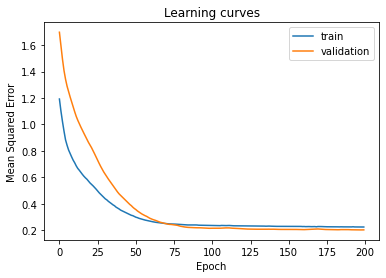

In [17]:
from sklearn.preprocessing import PowerTransformer

# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv'
df = read_csv(path, header=None)
# Split data input and output columns
X, y = df.values[:,:-1], df.values[:,-1]
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
# ensure the target variable is a 2d array
y_train, y_test = y_train.reshape(len(y_train), 1), y_test.reshape(len(y_test), 1)
# determine the number of input features
n_feature = X.shape[1]
# power transform input data
pt1 = PowerTransformer()
pt1.fit(X_train)
X_train = pt1.transform(X_train)
X_test = pt1.transform(X_test)
pt2 = PowerTransformer()
pt2.fit(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

# define model (hidden layer)
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_feature,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=0, validation_data=(X_test,y_test))

# predict test set
yhat = model.predict(X_test)

# inverse transforms on target variables
y_test = pt2.inverse_transform(y_test)
yhat = pt2.inverse_transform(yhat)

# evluate predictions
score = mean_absolute_error(y_test, yhat)
print('MSE: %.3f' % score)

# plot learning curve
pyplot.title('Learning curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

## K-fold cross validation

In [19]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold

# The k-fold cross-validation procedure can provide a more reliable estimate of MLP performance

# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv'
df = read_csv(path, header=None)
# Split data input and output columns
X, y = df.values[:,:-1], df.values[:,-1]
# K-fold cross validation
kfold = KFold(10)
# enumberate list
scores = list()

# 2 hidden layers, 1 output
for train_ix, test_ix in kfold.split(X, y):
    # split data into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
    # ensure the target variable is a 2d array
    y_train, y_test = y_train.reshape(len(y_train), 1), y_test.reshape(len(y_test), 1)
    # determine the number of input features
    n_feature = X.shape[1]
    # define model (hidden layer)
    model = Sequential()
    model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_feature,)))
    model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(1))
    # complile the model
    model.compile(optimizer='adam', loss='mse')
    # fit the model
    history = model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=0, validation_data=(X_test,y_test))

    # predict test set
    yhat = model.predict(X_test)
    # evaluate predictions
    score = mean_absolute_error(y_test, yhat)
    print('>%.3f' % score)
    scores.append(score)
    
print('Mean MAE: %.3f (%.3f)' % (mean(scores),std(scores)))

>28.071
>38.099
>35.984
>37.190
>30.158
>25.512
>33.777
>27.076
>33.107
>32.532
Mean MAE: 32.151 (4.118)


In [23]:
from sklearn.preprocessing import MinMaxScaler

# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv'
df = read_csv(path, header=None)
# Split data input and output columns
X, y = df.values[:,:-1], df.values[:,-1]
y = y.reshape(len(y),1)
# prepare input data
pt1 = MinMaxScaler()
pt1.fit(X)
X = pt1.transform(X)
# prepare target data
pt2 = MinMaxScaler()
pt2.fit(y)
y = pt2.transform(y)

# Determine the number of features
n_feature = X.shape[1]

# define model (hidden layer)
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_feature,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=0, validation_data=(X_test,y_test))

# define a row of new data
row = [13]
# transform the input data
X_new = pt1.transform([row])
# make a prediction
yhat = model.predict(X_new)
# invert transform on prediction
yhat = pt2.inverse_transform(yhat)
# report prediction
print('f(%s)=%.3f' %(row,yhat[0]))

f([13])=1254.693
